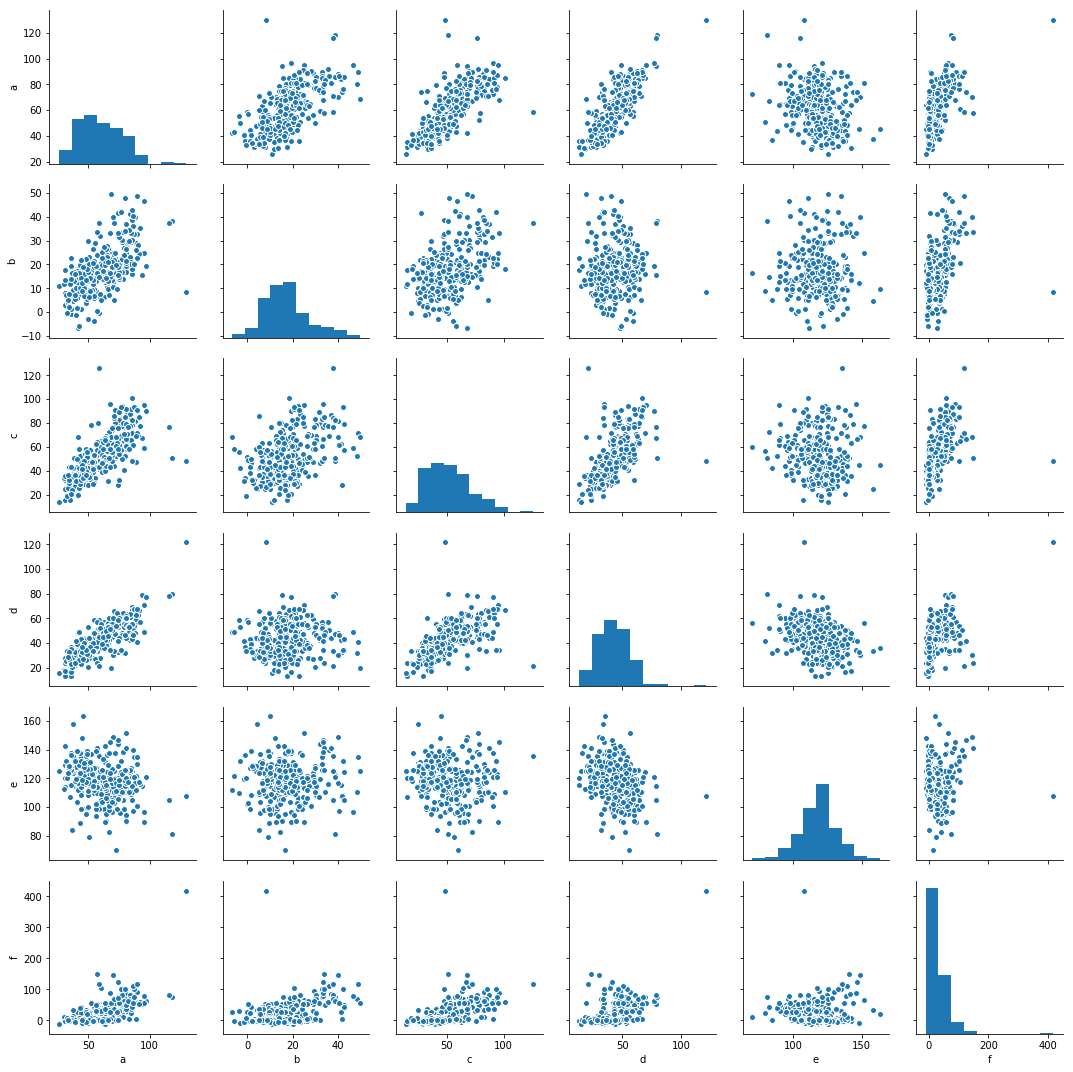

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/Users/divyatmika/Documents/INF 552 - ML/vertebral_column_data/column_2C.dat', sep='\s+', header=None, skiprows=0)
#rename columns
df.columns = ['a','b','c','d','e','f','g']

#scatterplots
import matplotlib.pyplot as plt
import seaborn as sos
%matplotlib inline
sns.pairplot(df)
plt.show()

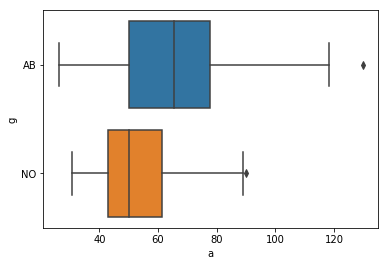

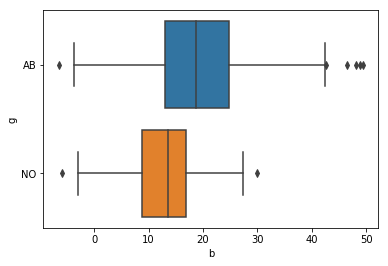

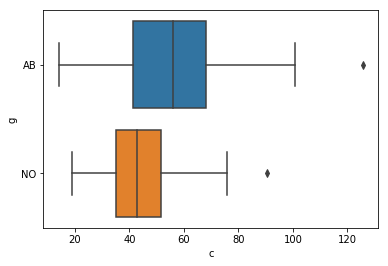

In [4]:
#boxplots for each column 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="a", y="g", data=df)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="b", y="g", data=df)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="c", y="g", data=df)
plt.show()

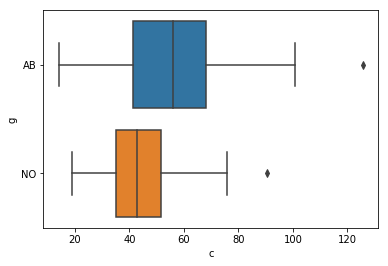

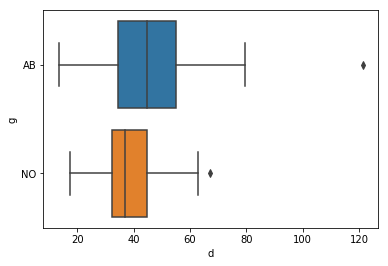

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="c", y="g", data=df)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="d", y="g", data=df)
plt.show()

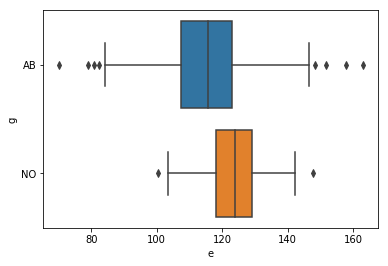

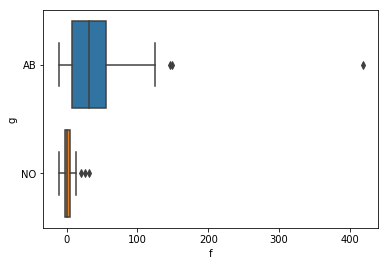

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="e", y="g", data=df)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="f", y="g", data=df)
plt.show()

# Retrieve data for AB and select train and test data

In [31]:
dataAB = df.loc[df['g'] == 'AB']
dataSetAB = dataAB[:140]
dataSetABTest = dataAB[140:]
dataNO = df.loc[df['g'] == 'NO']
dataSetNO = dataNO[:70]
dataSetNOTest = dataNO[70:]

dataTrain = dataSetAB.append(dataSetNO)
dataTest = dataSetABTest.append(dataSetNOTest)

In [32]:
feature_columns = ['a', 'b', 'c','d', 'e','f']
X_train = dataTrain[feature_columns].values
Y_train = dataTrain['g'].values
X_test = dataTest[feature_columns].values
Y_test = dataTest['g'].values

# Calculate KNN using Eucledian distance and plot test and train error


In [33]:
#calculate train and error rates wrt to k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

error_score_test = []
error_score_train = []
k_list = list(range(1,211,3))
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    y_predtrain = knn.predict(X_train)
    error_score_test.append(1-accuracy_score(Y_test, y_predtest ))
    error_score_train.append(1-accuracy_score(Y_train, y_predtrain))

16
0.0


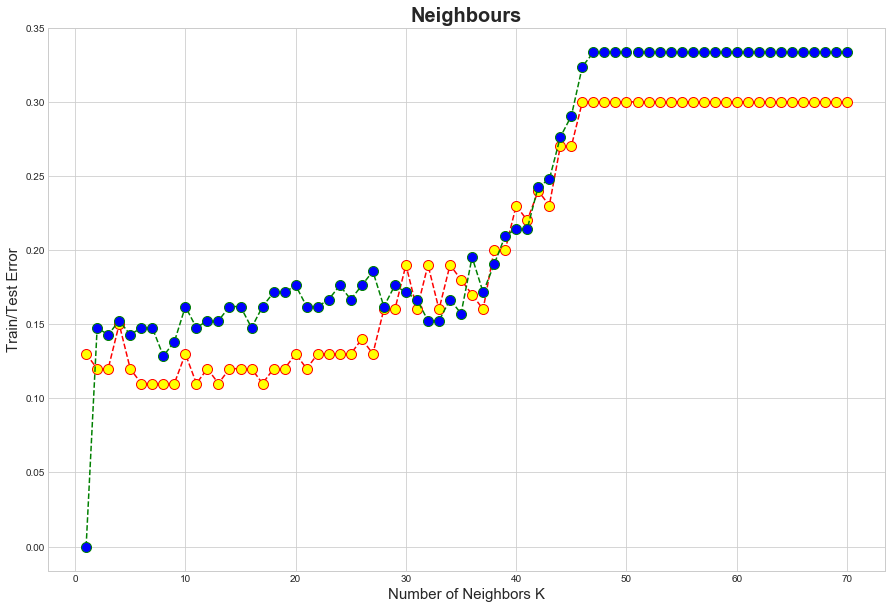

In [36]:

print(k_list[error_score_test.index(min(error_score_test))])
print(min(error_score_train))

#Plot the graph 
plt.figure(figsize=(15,10))
plt.title('Neighbours', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Train/Test Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(range(1, 71), error_score_test, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.plot(range(1, 71), error_score_train, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.show()


# Calculate Confusion Matrix and True Positive

In [26]:

#Calculate best k for min error rate. 
from sklearn.metrics import classification_report, confusion_matrix  
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, Y_train)
y_predtest = knn.predict(X_test)
CM = confusion_matrix(Y_test, y_predtest)
print(CM)
TN = CM[0][0]
TP = CM[1][1]
print(classification_report(Y_test, y_predtest))  

[[70  0]
 [11 19]]
             precision    recall  f1-score   support

         AB       0.86      1.00      0.93        70
         NO       1.00      0.63      0.78        30

avg / total       0.90      0.89      0.88       100



# C(iii) Training set size vs best test error rate

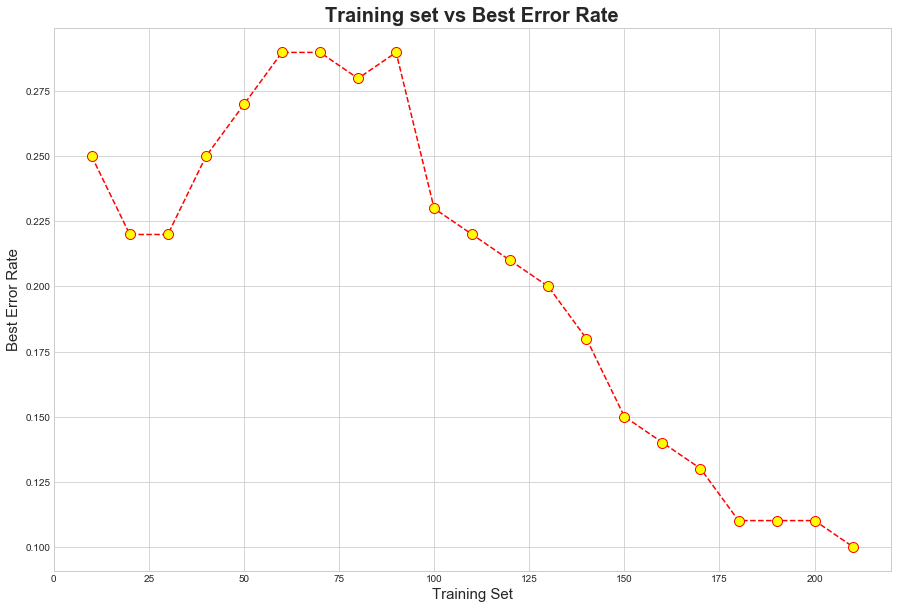

In [27]:
#N and 2n/3
kValues = []
NValues = range(10,220,10)
for N in range(10,220,10):
    indexNO = math.floor(N/3)
    indexAB = N - indexNO
    data_SetAB = dataAB[:indexAB]
    data_SetNO = dataNO[:indexNO]  
    data_Train = data_SetAB.append(data_SetNO)
    X_trainSet = data_Train[feature_columns].values
    Y_trainSet = data_Train['g'].values
    k_list = range(1,N,5)
    error_score_test = []
    for i in k_list:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_trainSet, Y_trainSet)
        y_predtest = knn.predict(X_test)
        error_score_test.append(1-accuracy_score(Y_test, y_predtest ))
        
    kValue = min(error_score_test)
    kValues.append(kValue)
        

plt.figure(figsize=(15,10))
plt.title('Training set vs Best Error Rate', fontsize=20, fontweight='bold')
plt.xlabel('Training Set', fontsize=15)
plt.ylabel('Best Error Rate', fontsize=15)
sns.set_style("whitegrid")
plt.plot(range(10,220,10), kValues, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)

plt.show()

# d(i) Minkowski Distance when p = 1

In [37]:

df = pd.read_csv('/Users/divyatmika/Documents/INF 552 - ML/vertebral_column_data/column_2C.dat', sep='\s+', header=None, skiprows=0)
#rename columns
df.columns = ['a','b','c','d','e','f','g']

In [38]:
#Retrieve data for AB and select train and test data
dataAB = df.loc[df['g'] == 'AB']
dataSetAB = dataAB[:140]
dataSetABTest = dataAB[140:]
dataNO = df.loc[df['g'] == 'NO']
dataSetNO = dataNO[:70]
dataSetNOTest = dataNO[70:]

dataTrain = dataSetAB.append(dataSetNO)
dataTest = dataSetABTest.append(dataSetNOTest)

feature_columns = ['a', 'b', 'c','d', 'e','f']
X_train = dataTrain[feature_columns].values
Y_train = dataTrain['g'].values
X_test = dataTest[feature_columns].values
Y_test = dataTest['g'].values

In [46]:
test_array = {}
train_array = {}
for i in range(1,200,5) :
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    y_predtrain = knn.predict(X_train)
    test_array.update({i: 1-(accuracy_score(Y_test, y_predtest))})

# Test Error Table for each k for Minkowski Distance when p = 1 Manhattan Distance

In [41]:
test_array

{1: 0.12,
 6: 0.14,
 11: 0.10999999999999999,
 16: 0.14,
 21: 0.12,
 26: 0.12,
 31: 0.12,
 36: 0.13,
 41: 0.13,
 46: 0.14,
 51: 0.14,
 56: 0.15000000000000002,
 61: 0.15000000000000002,
 66: 0.16000000000000003,
 71: 0.14,
 76: 0.15000000000000002,
 81: 0.16000000000000003,
 86: 0.17000000000000004,
 91: 0.19999999999999996,
 96: 0.20999999999999996,
 101: 0.21999999999999997,
 106: 0.22999999999999998,
 111: 0.22999999999999998,
 116: 0.22999999999999998,
 121: 0.21999999999999997,
 126: 0.27,
 131: 0.28,
 136: 0.30000000000000004,
 141: 0.30000000000000004,
 146: 0.30000000000000004,
 151: 0.30000000000000004,
 156: 0.30000000000000004,
 161: 0.30000000000000004,
 166: 0.30000000000000004,
 171: 0.30000000000000004,
 176: 0.30000000000000004,
 181: 0.30000000000000004,
 186: 0.30000000000000004,
 191: 0.30000000000000004,
 196: 0.30000000000000004}

# Best K for Minkowski when p = 1 i.e. Manhattan Distance

In [43]:
 min(test_array, key=test_array.get)

11

# d(i) B. 

In [75]:
import math
result = {}
manhattan_k = 11
pVal = []
for index in range(1,11):
    i = index/10
    k = math.pow(10,i)
    pVal.append(k)
for m in pVal:
    knn = KNeighborsClassifier(n_neighbors=manhattan_k,p=m)
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    result.update({m: 1-(accuracy_score(Y_test, y_predtest))})

# Test Error Table for each k for D(i) B. 

In [80]:
result

{1.2589254117941673: 0.10999999999999999,
 1.5848931924611136: 0.10999999999999999,
 1.9952623149688795: 0.12,
 2.51188643150958: 0.12,
 3.1622776601683795: 0.12,
 3.9810717055349722: 0.12,
 5.011872336272722: 0.12,
 6.309573444801933: 0.10999999999999999,
 7.943282347242816: 0.10999999999999999,
 10.0: 0.10999999999999999}

# d(i) B. Calculate Best log(10) p

In [91]:
k = min(result.values())
print(k)
best_p = []
for key,val in result.items():
    if val == k:
        best_p.append(key)
        
best_p
best_log_p = [math.log10(v) for v in best_p]
best_log_p

0.10999999999999999


[0.10000000000000002, 0.20000000000000004, 0.8, 0.9, 1.0]

# d(i) C . Calculate for Chebshyv Distance

In [58]:
result = {}
for i in range(1,200,5) :
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    result.update({i: 1-(accuracy_score(Y_test, y_predtest))})

In [59]:
result

{1: 0.13,
 6: 0.13,
 11: 0.12,
 16: 0.12,
 21: 0.10999999999999999,
 26: 0.14,
 31: 0.12,
 36: 0.13,
 41: 0.13,
 46: 0.13,
 51: 0.12,
 56: 0.14,
 61: 0.14,
 66: 0.13,
 71: 0.14,
 76: 0.15000000000000002,
 81: 0.14,
 86: 0.16000000000000003,
 91: 0.15000000000000002,
 96: 0.17000000000000004,
 101: 0.18999999999999995,
 106: 0.18999999999999995,
 111: 0.18000000000000005,
 116: 0.19999999999999996,
 121: 0.20999999999999996,
 126: 0.21999999999999997,
 131: 0.25,
 136: 0.29000000000000004,
 141: 0.30000000000000004,
 146: 0.30000000000000004,
 151: 0.30000000000000004,
 156: 0.30000000000000004,
 161: 0.30000000000000004,
 166: 0.30000000000000004,
 171: 0.30000000000000004,
 176: 0.30000000000000004,
 181: 0.30000000000000004,
 186: 0.30000000000000004,
 191: 0.30000000000000004,
 196: 0.30000000000000004}

# D (ii) Mahalanobis Distance 

In [60]:
import numpy as np
result = {}
k = np.arange(1,200,5)
X_covariance = np.cov(X_train)
X_covariance_inverse = np.linalg.inv(X_covariance)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute',metric='mahalanobis',metric_params={'VI': X_covariance_inverse})
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    result.update({i: 1-(accuracy_score(Y_test, y_predtest))})


# Print the test error table and k

In [61]:
result

{1: 0.17000000000000004,
 6: 0.17000000000000004,
 11: 0.13,
 16: 0.16000000000000003,
 21: 0.15000000000000002,
 26: 0.15000000000000002,
 31: 0.10999999999999999,
 36: 0.10999999999999999,
 41: 0.12,
 46: 0.12,
 51: 0.10999999999999999,
 56: 0.09999999999999998,
 61: 0.09999999999999998,
 66: 0.10999999999999999,
 71: 0.13,
 76: 0.16000000000000003,
 81: 0.17000000000000004,
 86: 0.18999999999999995,
 91: 0.20999999999999996,
 96: 0.22999999999999998,
 101: 0.24,
 106: 0.26,
 111: 0.27,
 116: 0.28,
 121: 0.29000000000000004,
 126: 0.29000000000000004,
 131: 0.29000000000000004,
 136: 0.30000000000000004,
 141: 0.30000000000000004,
 146: 0.30000000000000004,
 151: 0.30000000000000004,
 156: 0.30000000000000004,
 161: 0.30000000000000004,
 166: 0.30000000000000004,
 171: 0.30000000000000004,
 176: 0.30000000000000004,
 181: 0.30000000000000004,
 186: 0.30000000000000004,
 191: 0.30000000000000004,
 196: 0.30000000000000004}

# e. Majority Polling with Euclidean Distance

In [62]:
#weights = distance
dataAB = df.loc[df['g'] == 'AB']
dataSetAB = dataAB[:140]
dataSetABTest = dataAB[140:]
dataNO = df.loc[df['g'] == 'NO']
dataSetNO = dataNO[:70]
dataSetNOTest = dataNO[70:]
dataTrain = dataSetAB.append(dataSetNO)
X_train = dataTrain[feature_columns].values
Y_train = dataTrain['g'].values
X_test = dataTest[feature_columns].values
Y_test = dataTest['g'].values
error_score_test = []
error_score_train = []
k_list = range(1,211,5)
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    error_score_test.append(1-accuracy_score(Y_test, y_predtest ))
    best_error_rate = min(error_score_test)


In [64]:
best_error_rate

0.09999999999999998

# Majority polling with Manhattan Distance


In [65]:
error_score_test = []
error_score_train = []
k_list = range(1,211,5)
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i,p=1,weights='distance')
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    error_score_test.append(1-accuracy_score(Y_test, y_predtest ))
    best_error_rate = min(error_score_test)

In [66]:
best_error_rate

0.09999999999999998

# Majority Polling with Chebyshev Distance 

In [67]:
error_score_test = []
error_score_train = []
k_list = range(1,211,5)
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights='distance')
    knn.fit(X_train, Y_train)
    y_predtest = knn.predict(X_test)
    error_score_test.append(1-accuracy_score(Y_test, y_predtest ))
    best_error_rate = min(error_score_test)

In [68]:
best_error_rate

0.10999999999999999

# F. Best Training Error rate obtained is 0.0 